In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<matplotlib.colorbar.Colorbar instance at 0x11c71d830>

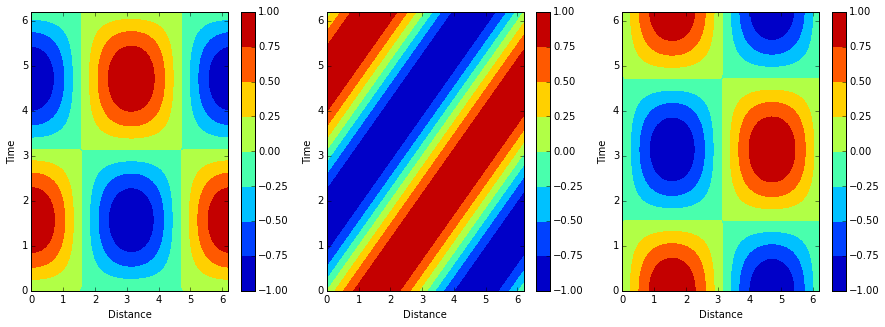

In [83]:
x = np.arange(0,2*np.pi,0.1)
t = np.arange(0,2*np.pi,0.1)
xf, tf = np.meshgrid(x,t)

eta1 = -np.cos(xf)*np.sin(-tf)
eta2 = np.sin(xf-tf)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.contourf(x,t,eta1)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.colorbar()
plt.subplot(1,3,2)
plt.contourf(x,t,eta2)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.colorbar()
plt.subplot(1,3,3)
plt.contourf(x,t,eta1+eta2)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.colorbar()

In [41]:
c = np.sqrt(67 * 9.8)
omega = 2 * np.pi / (12.4*3600.)
ke = omega / c
lamb = 2 * np.pi / ke
print (lamb/2./1000, 'maximum variation distance in km')

(571.93230704341227, 'maximum variation distance in km')


<matplotlib.colorbar.Colorbar instance at 0x14bdcf368>

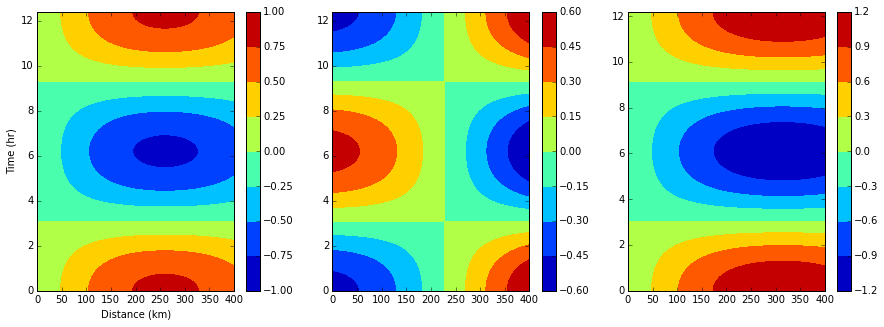

In [177]:
L = 400e3
x = np.arange(0,L*1.02,0.02*L)
t = np.arange(0,2*np.pi,0.02) / omega
Kappa = 0.29 * omega
xf, tf = np.meshgrid(x,t)
eta = (-np.cos(ke * xf) * np.sin(-omega * tf) + np.sin(ke * xf - omega * tf)) * np.exp(- Kappa * xf / (2*c))
etaimage = (( - np.cos(ke * (2*L - xf)) * np.sin(- omega * tf)
            + sin(ke *(2*L - xf) - omega * tf) )
            * np.exp(- Kappa * (2*L - xf) / (2*c)) )
etaimage2 = (( -np.cos(ke * (2*L + xf)) * np.sin(-omega * tf)
             + sin(ke * (2*L + xf) - omega * tf) )
            * np.exp(- Kappa * (2*L + xf) / (2*c)) )
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.contourf(x/1000., t/3600., eta)
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()
plt.subplot(1,3,2)
plt.contourf(xf/1000., tf/3600., etaimage)
plt.colorbar()
plt.subplot(1,3,3)
plt.contourf(xf/1000., tf/3660., eta + etaimage - etaimage2)
plt.colorbar()

Maximum impact in at head of domain.

Note that it is completely a standing wave. 

[ 80  82  84  86  88  91  94  98 102 106 111 117 123 129 136 143 150 157
 162 168 173 177 180 184 187 189 191 193 195 197 199 200 201 203 204 205
 206 207 208 209 209 210 211 212 212 213 214 215 215 216 217]
0.705687782465
21.772396215
1.05143236232 -9.16732472209


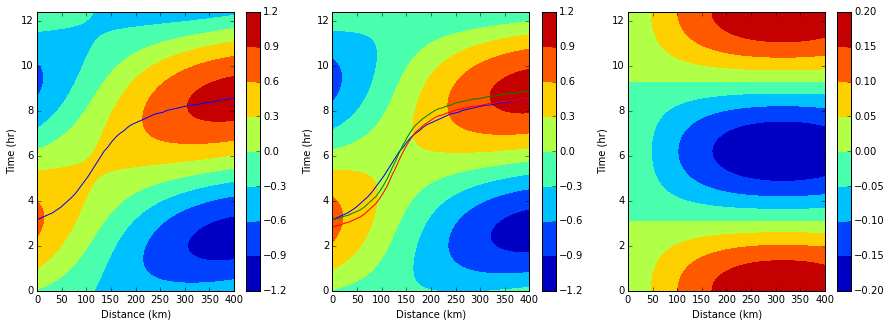

In [245]:
x = np.arange(0,L*1.02,0.02*L)
t = np.arange(0,2*np.pi,0.02) / omega
xf, tf = np.meshgrid(x,t)
phase = 1.32*np.pi
Ak = 0.67*cos(ke*xf - omega*tf - phase)
Bk = 0.35*cos(-ke*xf - omega*tf + 2*ke*L - phase)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.contourf(x/1000., t/3600., Ak+Bk)
themax = np.argmax(Ak+Bk,axis=0)

plt.plot(x/1000.,t[themax]/3600.)
print (themax)
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()
plt.subplot(1,3,2)
total = (Ak+Bk +0.16*(eta + etaimage - etaimage2)) 
scale = np.max(Ak+Bk)/np.max(total)
total = total *scale
plt.contourf(x/1000., t/3600., total)
themax2 = np.argmax(total,axis=0)
plt.plot(x/1000.,t[themax]/3600.)
plt.plot(x/1000.,t[themax2]/3600.)
plt.plot(x/1000.,(t[themax2]+t[themax[-1]]-t[themax2[-1]])/3600.)
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()
plt.subplot(1,3,3)
plt.contourf(x/1000., t/3600., 0.16*(eta + etaimage - etaimage2) *scale)
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()
print np.min(np.max(total, axis = 0))/ np.min(np.max(Ak+Bk, axis = 0))
print np.max(t[themax]-t[themax2]-t[themax[-1]]+t[themax2[-1]])*360./(12.4*3600.)
print scale, (t[themax[-1]]-t[themax2[-1]])*360./(12.4*3600.)

phase = -0.4 pi and amp = -0.4: phase lates in center, so phase change between "victoria" and "pt atkinson" too low, amphidrome too deep   
phase = -0.4 pi and amp = 0.4: phase early in center, total phase change too big, amphidrome too early

This suggests flux is too little.  Maximum in eta is at 1.5 hours, maximum u is 54 degrees or 1.85 hours later, and eta follows u by 90o, 3.1 hours for a standing wave.  So pushing in u should give a maximum in eta at 6.75 hours, but what I have is a minimum.  So I need more flux!

phase = -0.4 pi and amp = 0.1: phase difference better, but amphidrome too full  
phase = -0.6 pi and amp = 0.1: phase difference good, amphidrome too deep  
phase = -0.6 pi and amp = 0.2: phase difference good (max 15o) amphidrome a bit too much too deep (60% rather than 70%)  
phase = -1.32 pi and amp = 0.16 phase difference good (max 21o) amphidrome good

Maximum eta is now at 3 hours, maximum u is 1.85 hours later and eta follows u by 3.1 hours.  So pushing u should give a maximum in eta at 7.95 hours, 8 hours.  I have a minimum at 6.2 hours.

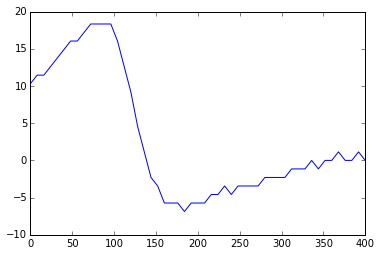

In [228]:
plt.plot(x/1000.,(t[themax]-t[themax2]-t[themax[-1]]+t[themax2[-1]])*360./(12.4*3600.))

[ 0.68524343  0.6530001   0.61996811  0.5862851   0.55211999  0.51766035
  0.4831435   0.44888024  0.41521021  0.38258083  0.35161104  0.32301109
  0.29772823  0.27689303  0.26174483  0.25341958  0.25267243  0.25956069
  0.27344544  0.29325113  0.31771712  0.34568161  0.37615924  0.40840789
  0.44177474  0.47583729  0.51016528  0.54450123  0.57856559  0.61221291
  0.64519996  0.67744284  0.70876157  0.73905992  0.76824506  0.79622787
  0.82292334  0.84825084  0.87213443  0.89450315  0.91531657  0.9345704
  0.95214158  0.96797984  0.98216985  0.99455859  1.00512688  1.01395934
  1.02090759  1.02603057  1.02932616]
[ 0.68524343  0.65290369  0.61965011  0.58565218  0.55101777  0.51595119
  0.48063477  0.44531231  0.41035437  0.37610454  0.34311519  0.31208552
  0.28391875  0.25979734  0.2411511   0.22947016  0.22594349  0.23095722
  0.24393166  0.26360902  0.28848444  0.3171484   0.34847363  0.38160213
  0.41584425  0.45075048  0.48588107  0.5209821   0.55579429  0.59013666
  0.62379242  

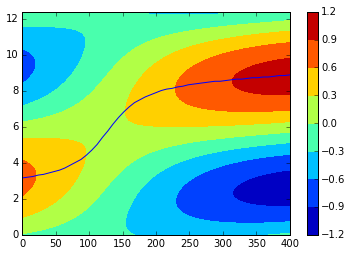

In [253]:
plt.contourf(x/1000., t/3600., total - 0.25*(eta + etaimage - etaimage2)*cos(2.8*3600.*omega))
plt.plot(x/1000.,t[themax2]/3600.)
plt.colorbar()
print np.max(total - 0.25*(eta + etaimage - etaimage2)*cos(2.8*3600.*omega), axis = 0)
print np.max(total, axis=0)